### Análise desembolso BNDES período 95-18 

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [207]:
data = pd.read_csv("DataBNDS.csv",';')
data['data'] = [i.split('/')[2] for i in data['data']]
data_y = pd.DataFrame(columns = [str(i) for i in range(1995,2019)])
for i in range(1995,2019):
    data_y[str(i)] = data[data['data'] == str(i)]['valor'].values    
means = []
for i in data_y:
    means.append(sum(data_y[i].values))

In [208]:
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

norm = np.array(means/Total)
media = sum(norm)/len(means)
sigma = sum(np.arange(len(norm))*(norm-media)**2)

popt, pcov = curve_fit(gauss_function,np.arange(0,len(norm)),norm, p0 = [0, media, sigma])

count       297.000000
mean      35816.801347
std       39729.675673
min         429.000000
25%        7703.000000
50%       19221.000000
75%       48591.000000
max      190419.000000
Name: valor, dtype: float64
f(x) = 0.092114*exp{(17.301469 - x)^2}/(8.479525)^2


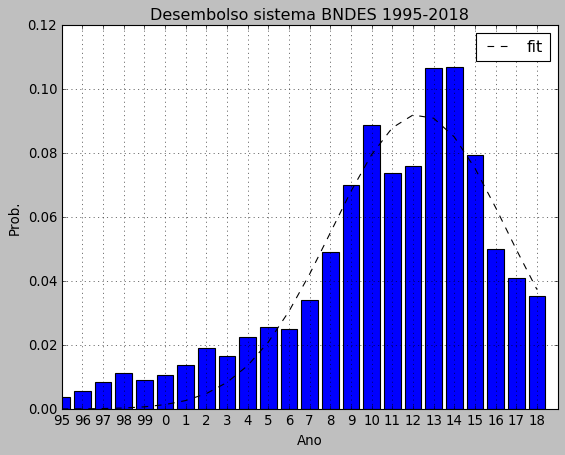

In [209]:
print(data['valor'].describe())
print('f(x) = %f*exp{(%f - x)^2}/(%f)^2'%(popt[0],popt[1],2*popt[2]))
plt.style.use('classic')
plt.bar(range(1995,2019),means/Total)
plt.plot(np.arange(1995,2019), gauss_function(np.arange(0,24), *popt),color = 'Black', label='fit',linestyle ='--')
plt.xlim(1995,2019)
plt.grid()
plt.xlabel('Ano')
plt.ylabel('Prob.')
plt.legend()
plt.xticks(range(1995,2019), labels = labels)
plt.title('Desembolso sistema BNDES 1995-2018')
plt.show()